# **Zamontowanie dysku Google**

In [34]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **Import potrzebnych bibliotek**

In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt

# **Wczytanie modelu sieci neuronowej**

In [36]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/6')

# **Podsumowanie modelu**

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 170528)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                10913856  
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

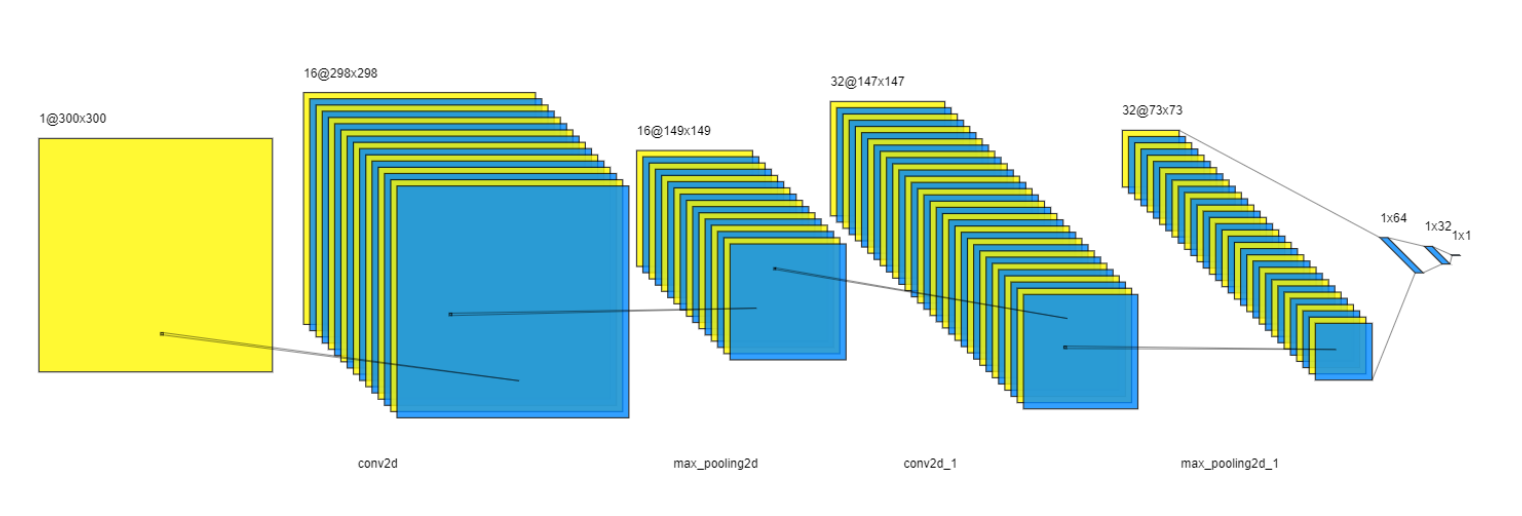

# **Wczytanie obrazów ze zbioru testowego**

In [38]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/casting_data/casting_data/test',
    target_size=(300, 300),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=1)

Found 715 images belonging to 2 classes.


# **Ewaluacja modelu**

In [39]:
result = model.evaluate(test_data)
print(f"Precyzja modelu na zbiorze testowym: {round(100*result[1],2)}%")

715/715 [==============================] - 20s 28ms/step - loss: 0.0035 - accuracy: 1.0000
Precyzja modelu na zbiorze testowym: 100.0%


# **Wizualizacja działania sieci neuronowej**

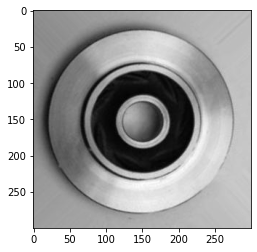

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Obraz oznaczony jako: OK
Predykcja klasyfikatora: OK
______________________________________________________________




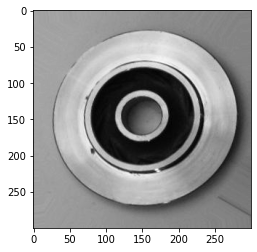

Obraz oznaczony jako: DEFEKT
Predykcja klasyfikatora: DEFEKT
______________________________________________________________




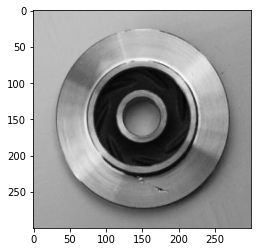

Obraz oznaczony jako: DEFEKT
Predykcja klasyfikatora: DEFEKT
______________________________________________________________




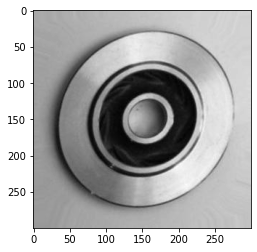

Obraz oznaczony jako: OK
Predykcja klasyfikatora: OK
______________________________________________________________




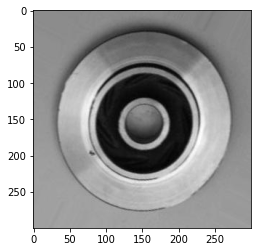

Obraz oznaczony jako: DEFEKT
Predykcja klasyfikatora: DEFEKT
______________________________________________________________




In [41]:
number_of_displays = 5
counter = 0

for image in test_data:

  # ograniczenie ilości wyświetlonych obrazów
  counter += 1
  if counter > number_of_displays:
    break

  # wyświetlanie obrazów
  image_to_be_displayed = image[0][:, :, :, 0]
  plt.imshow(image_to_be_displayed[0], cmap='gray')
  plt.show()

  # predykcja sieci neuronowej
  result = model.predict_classes(image[0])
  if result[0][0]:
    predicted_label = "OK"
  else:
    predicted_label = "DEFEKT"

  # sprawdzenie jak oznaczony jest obraz w zbiorze danych
  if image[1]:
    image_label = "OK"
  else:
    image_label = "DEFEKT"
    
  # drukowanie informacji
  print(f"Obraz oznaczony jako: {image_label}\nPredykcja klasyfikatora: {predicted_label}\n______________________________________________________________\n\n")